In [ ]:
#PRATIKSHA MEHTA
#60009220172
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import LinearSVC
import sklearn.svm as svm
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from __future__ import division,print_function



In [ ]:
x, y = make_classification(n_samples=5000, n_features=10, n_classes=3,n_clusters_per_class = 1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.15)

In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C = 1.0, class_weight = None, dual = True, fit_intercept = True, intercept_scaling = 1, loss = 'squared_hinge', max_iter = 1000, multi_class='ovr', penalty='l2', random_state = None, tol=0.0001, verbose=0)
lsvc.fit(xtrain, ytrain)

LinearSVC()


LinearSVC()

In [ ]:
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.9138823529411765


In [ ]:
cv_score = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_score.mean())

CV average score: 0.91


In [ ]:
ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest,ypred)
print(cm)

[[224  39   1]
 [  2 250   9]
 [ 11   3 211]]


In [ ]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       264
           1       0.86      0.96      0.90       261
           2       0.95      0.94      0.95       225

    accuracy                           0.91       750
   macro avg       0.92      0.91      0.91       750
weighted avg       0.92      0.91      0.91       750



IRIS

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.15)


In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C = 1.0, class_weight = None, dual = True, fit_intercept = True, intercept_scaling = 1, loss = 'squared_hinge', max_iter = 1000, multi_class='ovr', penalty='l2', random_state = None, tol=0.0001, verbose=0)

LinearSVC()


LinearSVC()

In [ ]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.968503937007874


In [ ]:
cv_score = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_score.mean())

CV average score: 0.94


In [ ]:
ypred = lsvc.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)

[[5 0 0]
 [0 8 1]
 [0 0 9]]


In [ ]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.96        23
   macro avg       0.97      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



SVM BASICS

In [ ]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
def evaluate_on_test_data(model=True):
  predictions = model.predict(X_test)
  correct_classification = 0
  for i in range(len(y_test)):
    if predictions[i]==y_test[i]:
      correct_classification += 1
  accuracy = 100*correct_classification/len(y_test) #accuracy as a percentage
  return accuracy

In [ ]:
kernels = ('linear','poly','rbf')
accuracies = []
for index,kernel in enumerate(kernels):
  model = svm.SVC(kernel=kernel)
  model.fit(X_train,y_train)
  acc = evaluate_on_test_data(model)
  accuracies.append(acc)
  print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

84.21052631578948 % accuracy obtained with kernel = linear
76.3157894736842 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf


In [ ]:
svc = svm.SVC(kernel='linear').fit(X_train,y_train)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7).fit(X_train,y_train)
poly_svc = svm.SVC(kernel='poly',degree=3).fit(X_train,y_train)

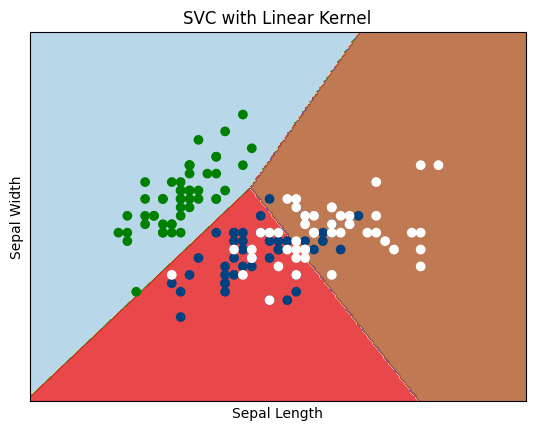

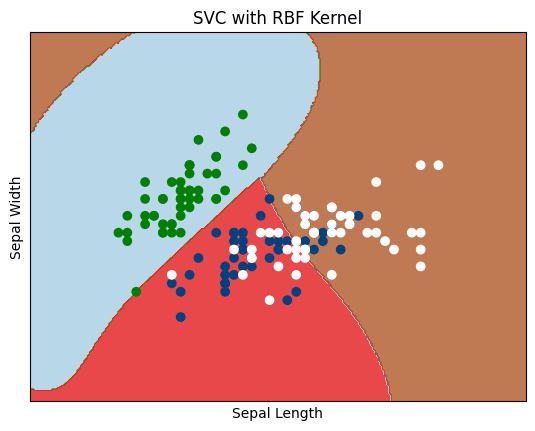

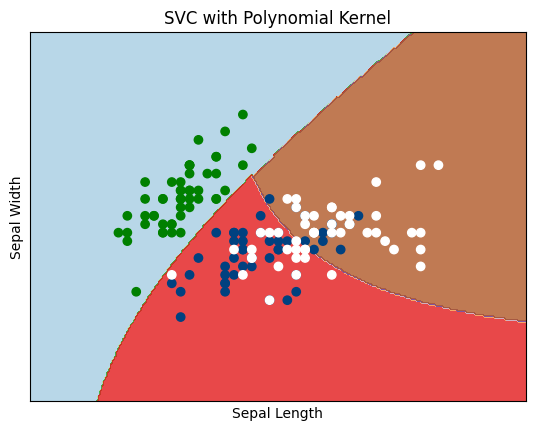

In [ ]:
h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#define title for the plots
titles = ['SVC with Linear Kernel', 'SVC with RBF Kernel', 'SVC with Polynomial Kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
  plt.figure(i)

  Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)

  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.ocean)
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')

  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()

HYPERMETER TUNING

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning

X,y = fetch_openml("mnist_784", version=1, return_X_y = True, as_frame=False)
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
start_time = time.time()
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)
lin_time = time.time() - start_time

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf',gamma = 'scale')
svm_clf.fit(X_train_scaled[:10000],y_train[:10000])
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)


0.9455333333333333

RANDOMIZED SEARCHCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001,0.1),"C":uniform(1,10)}
start_time = time.time()
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
print(X_train_scaled.shape)
print(y_train.shape)

X_train_scaled = X_train_scaled[:112]
y_train = y_train[:112]

rnd_search_cv.fit(X_train_scaled, y_train)
rnd_time = time.time() - start_time

(60000, 784)
(60000,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=9.522521193237553, gamma=0.0017228638804641853; total time=   0.0s
[CV] END ...C=9.522521193237553, gamma=0.0017228638804641853; total time=   0.0s
[CV] END ...C=9.522521193237553, gamma=0.0017228638804641853; total time=   0.0s
[CV] END ..C=2.5949622833438646, gamma=0.0034208140795710207; total time=   0.0s
[CV] END ..C=2.5949622833438646, gamma=0.0034208140795710207; total time=   0.0s
[CV] END ..C=2.5949622833438646, gamma=0.0034208140795710207; total time=   0.0s
[CV] END .....C=5.50395434100611, gamma=0.001388506583872587; total time=   0.0s
[CV] END .....C=5.50395434100611, gamma=0.001388506583872587; total time=   0.0s
[CV] END .....C=5.50395434100611, gamma=0.001388506583872587; total time=   0.0s
[CV] END ..C=2.6828625974523383, gamma=0.0060339207881328055; total time=   0.0s
[CV] END ..C=2.6828625974523383, gamma=0.0060339207881328055; total time=   0.0s
[CV] END ..C=2.68286259745

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=5.50395434100611, gamma=0.001388506583872587)

In [ ]:
rnd_search_cv.best_score_

0.7233285917496444

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.50395434100611, gamma=0.001388506583872587)